In [190]:
%run notebook_core_utils.ipynb
%run notebook_core_mappers.ipynb
%run notebook_labeling_auto.ipynb


In [34]:

ntsb_df = CoreUtils.get_data('ntsb', from_year=2015, to_year=2023)
asrs_ntsb_df =  pd.concat([asrs_df, ntsb_df], axis=0).reset_index(drop=True)

In [47]:
import pandas as pd
PATH_PREFIX = '../data/local_ex/astapm'
# asrs_df = CoreUtils.get_data('asrs', from_year=2022, to_year=2023)
asrs_df = pd.read_csv(f'{PATH_PREFIX}/asrs/asrs.csv', low_memory=False)
asrs_df = asrs_df[(asrs_df['year'] >= 2022) & (asrs_df['year'] <= 2023)]

In [61]:
df = asrs_df[['event_id', 'primary_problem', 'contributing_factors', 'human_factors']].copy()
df['primary_problem'].value_counts()

# df[df['primary_problem'] == 'Human Factors']

primary_problem
Aircraft                                        3725
Human Factors                                   3089
Procedure                                       1109
Ambiguous                                        766
Weather                                          262
Airport                                          221
Environment - Non Weather Related                202
Airspace Structure                               131
Chart Or Publication                             120
ATC Equipment / Nav Facility / Buildings          92
Software and Automation                           55
Company Policy                                    52
Equipment / Tooling                               46
MEL                                               29
Incorrect / Not Installed / Unavailable Part      23
Manuals                                            7
Staffing                                           7
Logbook Entry                                      1
Name: count, dtype: int64

In [64]:
df[df['primary_problem'] == 'Human Factors'].sample(n=10, random_state=42)

,event_id,primary_problem,contributing_factors,human_factors
219991,2046065,Human Factors,Human Factors,Fatigue; Workload
215440,1945790,Human Factors,Human Factors,NaN
216406,1963705,Human Factors,Chart Or Publication; Procedure; Human Factors,Communication Breakdown; Confusion; Situationa...
219603,2036500,Human Factors,Human Factors,Situational Awareness; Distraction; Time Press...
217748,1994852,Human Factors,Aircraft; Human Factors; Procedure,Communication Breakdown; Human-Machine Interface
217421,1986859,Human Factors,Procedure; Aircraft; Human Factors,Situational Awareness; Human-Machine Interface...
219935,2044641,Human Factors,Human Factors,Situational Awareness; Training / Qualification
211716,1880709,Human Factors,Environment - Non Weather Related; Human Factors,NaN
218909,2021519,Human Factors,Human Factors,Time Pressure; Situational Awareness
211750,1881367,Human Factors,Human Factors,Distraction; Other / Unknown; Troubleshooting;...


In [77]:
df['human_factors'].str.split(';', expand=True)

,0,1,2,3,4,5,6,7,8
114340,Situational Awareness,Human-Machine Interface,None,None,None,None,None,None,None
208299,Communication Breakdown,None,None,None,None,None,None,None,None
210852,Communication Breakdown,None,None,None,None,None,None,None,None
210857,Troubleshooting,None,None,None,None,None,None,None,None
210858,Troubleshooting,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
221000,Training / Qualification,None,None,None,None,None,None,None,None
221005,Time Pressure,Workload,Communication Breakdown,Troubleshooting,None,None,None,None,None
221006,Communication Breakdown,Fatigue,Time Pressure,Situational Awareness,None,None,None,None,None
221007,Communication Breakdown,Situational Awareness,None,None,None,None,None,None,None


In [65]:
df[df['primary_problem'] == 'Aircraft'].sample(n=10, random_state=42)

,event_id,primary_problem,contributing_factors,human_factors
212317,1890658,Aircraft,Aircraft,Troubleshooting; Workload
219581,2036128,Aircraft,Aircraft,NaN
220351,2055874,Aircraft,Aircraft,NaN
217371,1985935,Aircraft,Aircraft,NaN
214247,1921586,Aircraft,Aircraft,NaN
211446,1875954,Aircraft,Aircraft,Troubleshooting; Situational Awareness
218215,2006007,Aircraft,Human Factors; Aircraft,Confusion; Communication Breakdown; Troublesho...
212143,1887462,Aircraft,Aircraft,NaN
220332,2055391,Aircraft,Environment - Non Weather Related; Human Facto...,Workload; Communication Breakdown
215830,1952587,Aircraft,Aircraft,Troubleshooting; Time Pressure; Workload


In [189]:
def define_finding_description(row):
    # # https://sparkbyexamples.com/pandas/pandas-concatenate-two-columns/
    # # Concatenate the selected columns with a separator (e.g., a space or comma)
    primary_problem = row['primary_problem']

    primary_problem:str = row['primary_problem']
    contributing_factors:str = row['contributing_factors']
    human_factors:str = row['human_factors']

    return f"{primary_problem}-{contributing_factors}-{human_factors}".rstrip(':')

def get_human_factor(row, factor):
    human_factors:str = row['human_factors']
    
    if pd.isnull(human_factors):
        return factor
    
    human_factors_list = [factor.strip() for factor in human_factors.split(';')]
    return human_factors_list[0]

def define_finding_factor(row):
    factor = ''
    contributing_factors:str = row['contributing_factors']
    contributing_factors_list = [factor.strip() for factor in contributing_factors.split(';')]

    if len(contributing_factors_list) == 1:
        factor = contributing_factors_list[0]

        # if factor == 'Human Factors' or factor == 'Aircraft':
        factor = get_human_factor(row, factor)

        if factor == 'Aircraft':
            return 'Aircraft-Aircraft systems'

    else:
        contributing_factors_list = [factor for factor in contributing_factors_list if factor != 'Aircraft']

        if len(contributing_factors_list) == 1:
            factor = contributing_factors_list[0]

            # if factor == 'Human Factors':
            factor = get_human_factor(row, factor)
        elif 'Human Factors' in contributing_factors_list:
            factor = contributing_factors_list[0]
            factor = get_human_factor(row, factor)
        else:
            factor = contributing_factors_list[0]

    return factor

df['finding_factor'] = df.apply(define_finding_factor ,  axis=1)
df['finding_description'] = df.apply(define_finding_description ,  axis=1)

df['finding_factor'].value_counts()

finding_factor
Situational Awareness                           1597
Communication Breakdown                         1440
Troubleshooting                                 1394
Aircraft-Aircraft systems                        953
Workload                                         733
Time Pressure                                    692
Confusion                                        538
Distraction                                      407
Human Factors                                    302
Environment - Non Weather Related                296
Training / Qualification                         293
Human-Machine Interface                          260
Procedure                                        212
Other / Unknown                                  134
Airport                                          129
Physiological - Other                            113
Weather                                          104
ATC Equipment / Nav Facility / Buildings          68
Software and Automation        

In [163]:
df[['finding_factor', 'finding_description']]

,finding_factor,finding_description
114340,Situational Awareness,Ambiguous-Chart Or Publication; Human Factors-...
208299,Communication Breakdown,Weather-Human Factors; Weather-Communication B...
210852,MEL,Procedure-MEL; Procedure-Communication Breakdown
210857,Troubleshooting,Aircraft-Aircraft-Troubleshooting
210858,Troubleshooting,Human Factors-Human Factors-Troubleshooting
...,...,...
221000,Training / Qualification,Human Factors-Human Factors-Training / Qualifi...
221005,Weather,Company Policy-Weather; Company Policy; Airpor...
221006,Communication Breakdown,Ambiguous-Aircraft; Environment - Non Weather ...
221007,Communication Breakdown,Human Factors-Human Factors; Procedure; Softwa...


AutoLabeling sample_size= (9937, 6)
finding_factor


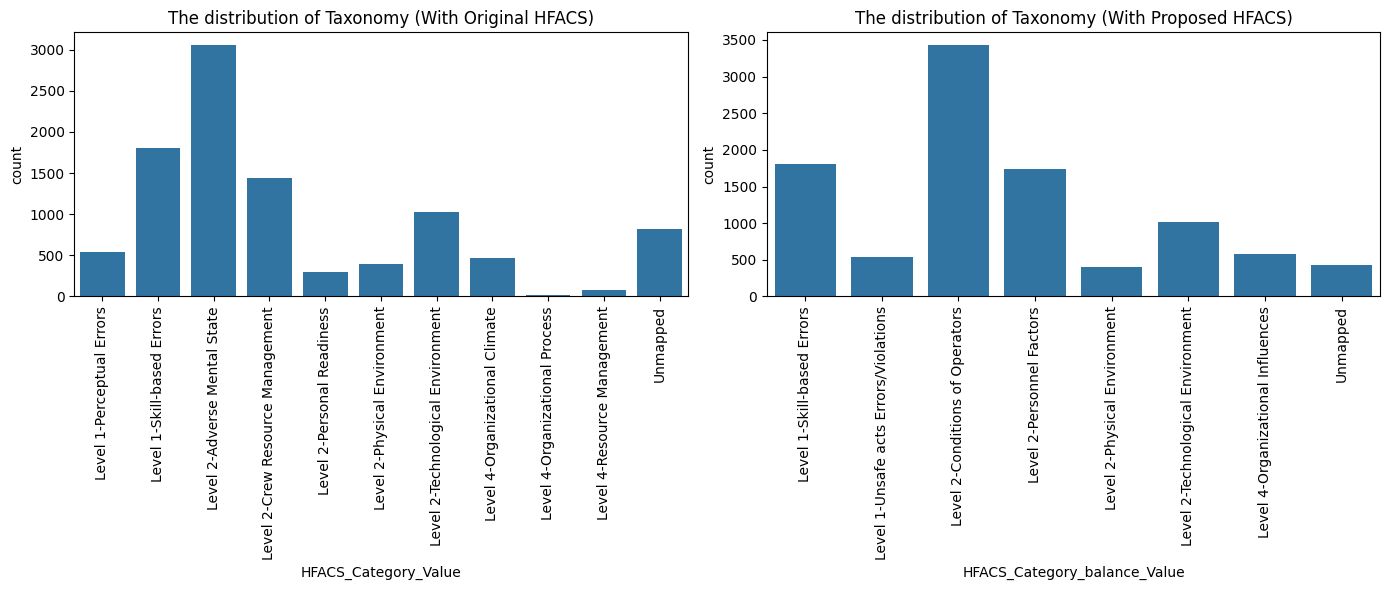

(9937, 12)


In [193]:
# asrs_df = CoreUtils.get_data('asrs', from_year=2022, to_year=2023)
# sample_df =  asrs_df.copy() #.sample(n=2000)

autoLabeling = AutoLabeling(df)

data = autoLabeling.do_auto_label()

print(data.shape)
data[['finding_description', 'HFACS_Category_balance_Value']].to_csv('./test.csv')

# NTSB

In [110]:
import pandas as pd
PATH_PREFIX = '../data/local_ex/astapm'
# asrs_df = CoreUtils.get_data('asrs', from_year=2022, to_year=2023)
ntsb_df = pd.read_csv(f'{PATH_PREFIX}/ntsb/ntsb.csv', low_memory=False)
ntsb_df = ntsb_df[(ntsb_df['year'] >= 2018) & (ntsb_df['year'] <= 2023)]


In [159]:

n_df = ntsb_df.copy()

def define_finding_factor_n(row):
    factor = ''
    finding_description:str = row['finding_description']
    finding_description_list = [factor.strip() for factor in finding_description.split('-')]

    if finding_description_list[0] == 'Not determined':
        return 'Not determined'
    
    factor = f"{finding_description_list[0]}-{finding_description_list[1]}-{finding_description_list[2]}".rstrip('-')

    return factor

n_df['finding_factor'] = n_df.apply(define_finding_factor_n ,  axis=1)
n_df = n_df[n_df['finding_factor'] != 'Not determined']

n_df['finding_factor'].value_counts()

finding_factor
Aircraft-Aircraft oper/perf/capability-Performance/control parameters     917
Personnel issues-Task performance-Use of equip/info                       794
Personnel issues-Action/decision-Info processing/decision                 341
Aircraft-Aircraft power plant-Engine (reciprocating)                      273
Aircraft-Fluids/misc hardware-Fluids                                      234
                                                                         ... 
Personnel issues-Psychological-Personality/attitude                         1
Personnel issues-Miscellaneous-(general)                                    1
Environmental issues-Operating environment-Approach aid coverage/avail      1
Aircraft-Aircraft systems-Lighting system                                   1
Aircraft-Aircraft systems-Communications system                             1
Name: count, Length: 86, dtype: int64

In [147]:
n_df[['finding_factor', 'finding_description']]

,finding_factor,finding_description
14759,Aircraft-Aircraft systems-Landing gear system,Aircraft-Aircraft systems-Landing gear system-...
14762,Personnel issues-Psychological-Perception/orie...,Personnel issues-Psychological-Perception/orie...
14764,Aircraft-Aircraft systems-Landing gear system,Aircraft-Aircraft systems-Landing gear system-...
14767,Personnel issues-Physical-Impairment/incapacit...,Personnel issues-Physical-Impairment/incapacit...
14771,Aircraft-Aircraft oper/perf/capability-Perform...,Aircraft-Aircraft oper/perf/capability-Perform...
...,...,...
19393,Aircraft-Fluids/misc hardware-Fluids,Aircraft-Fluids/misc hardware-Fluids-Hydraulic...
19394,Aircraft-Fluids/misc hardware-Fluids,Aircraft-Fluids/misc hardware-Fluids-Fuel-Flui...
19395,Aircraft-Aircraft systems-Landing gear system,Aircraft-Aircraft systems-Landing gear system-...
19396,Aircraft-Aircraft structures-Fuselage,Aircraft-Aircraft structures-Fuselage-Longeron...


AutoLabeling sample_size= (4274, 13)
personnel issues-psychological-perception/orientation/illusion personnel issues-psychological-perception/orientation/illusion
personnel issues-physical-impairment/incapacitation personnel issues-physical-impairment/incapacitation
personnel issues-psychological-attention/monitoring personnel issues-psychological-attention/monitoring
personnel issues-psychological-attention/monitoring personnel issues-psychological-attention/monitoring
personnel issues-psychological-attention/monitoring personnel issues-psychological-attention/monitoring
personnel issues-psychological-attention/monitoring personnel issues-psychological-attention/monitoring
personnel issues-psychological-perception/orientation/illusion personnel issues-psychological-perception/orientation/illusion
personnel issues-psychological-perception/orientation/illusion personnel issues-psychological-perception/orientation/illusion
personnel issues-psychological-attention/monitoring personnel iss

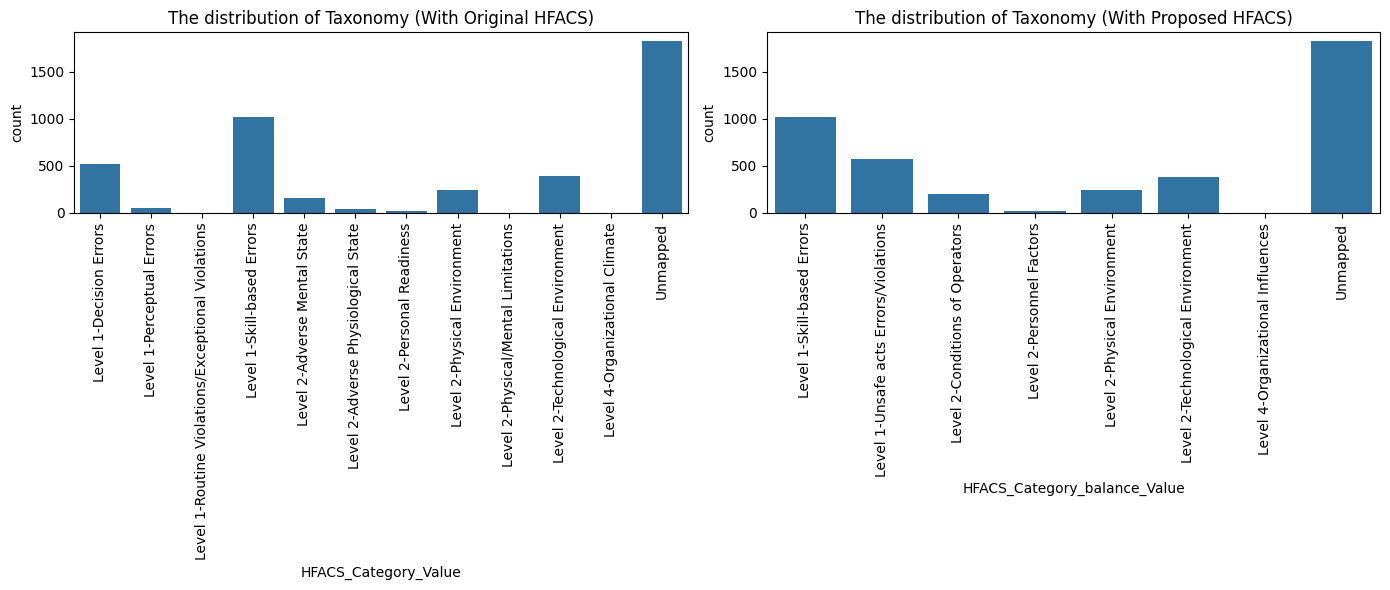

In [161]:
# sample_df =  ntsb_df.copy() #.sample(n=2000)

autoLabeling = AutoLabeling(n_df)

data = autoLabeling.do_auto_label()
# print(sample_df.shape)


In [152]:
data[data['HFACS_Category_Value'] == 'Unmapped']

,event_id,date,year,month,country,state,narrative_01,narrative_02,narrative_length,narrative_word_count,narrative_sentence_count,finding_description,finding_factor,HFACS_Category,HFACS_Category_Level,HFACS_Category_Value,HFACS_Category_balance,HFACS_Category_balance_Level,HFACS_Category_balance_Value
14759,20180102X44607,2018-01-01,2018,1,USA,OR,"On January 2, 2018, about 0920 Pacific standar...",NaN,4440.0,696.0,25.0,Aircraft-Aircraft systems-Landing gear system-...,Aircraft-Aircraft systems-Landing gear system,"(Unmapped, Unmapped, Unmapped, )",Unmapped,Unmapped,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
14764,20180101X32947,2018-01-01,2018,1,USA,VA,"On January 1, 2018, about 1725 eastern standar...",NaN,2742.0,427.0,17.0,Aircraft-Aircraft systems-Landing gear system-...,Aircraft-Aircraft systems-Landing gear system,"(Unmapped, Unmapped, Unmapped, )",Unmapped,Unmapped,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
14771,20180109X45300,2018-01-01,2018,1,USA,OK,"On January 6, 2018, about 1100 central standar...",NaN,1408.0,229.0,12.0,Aircraft-Aircraft oper/perf/capability-Perform...,Aircraft-Aircraft oper/perf/capability-Perform...,"(Unmapped, Unmapped, Unmapped, )",Unmapped,Unmapped,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
14776,20180111X85842,2018-01-01,2018,1,USA,WY,"The pilot reported that, while taxing with a t...",NaN,745.0,121.0,4.0,Aircraft-Aircraft oper/perf/capability-Perform...,Aircraft-Aircraft oper/perf/capability-Perform...,"(Unmapped, Unmapped, Unmapped, )",Unmapped,Unmapped,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
14778,20180111X72421,2018-01-01,2018,1,USA,NY,The pilot of the tailwheel-equipped airplane r...,NaN,1476.0,228.0,8.0,Aircraft-Aircraft oper/perf/capability-Perform...,Aircraft-Aircraft oper/perf/capability-Perform...,"(Unmapped, Unmapped, Unmapped, )",Unmapped,Unmapped,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19393,20231129193450,2023-11-01,2023,11,USA,FL,"On November 28, 2023, about 1828 eastern stand...",NaN,2300.0,362.0,16.0,Aircraft-Fluids/misc hardware-Fluids-Hydraulic...,Aircraft-Fluids/misc hardware-Fluids,"(Unmapped, Unmapped, Unmapped, )",Unmapped,Unmapped,"(Unmapped, Unmapped, Unmapped, )",Unmapped,Unmapped
19394,20231130193454,2023-11-01,2023,11,USA,MN,"On November 28, 2023, about 1031 central stand...",NaN,3337.0,549.0,27.0,Aircraft-Fluids/misc hardware-Fluids-Fuel-Flui...,Aircraft-Fluids/misc hardware-Fluids,"(Unmapped, Unmapped, Unmapped, )",Unmapped,Unmapped,"(Unmapped, Unmapped, Unmapped, )",Unmapped,Unmapped
19395,20231227193576,2023-12-01,2023,12,USA,AZ,"On December 26, 2023, about 1221 mountain stan...",NaN,2585.0,426.0,15.0,Aircraft-Aircraft systems-Landing gear system-...,Aircraft-Aircraft systems-Landing gear system,"(Unmapped, Unmapped, Unmapped, )",Unmapped,Unmapped,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment
19396,20240117193675,2023-09-01,2023,9,USA,NJ,"On September 21, 2023, the operator of a Bell ...",NaN,9429.0,1442.0,75.0,Aircraft-Aircraft structures-Fuselage-Longeron...,Aircraft-Aircraft structures-Fuselage,"(Unmapped, Unmapped, Unmapped, )",Unmapped,Unmapped,"(Level 2, Preconditions for Unsafe Acts, Envir...",Level 2,Level 2-Technological Environment


AutoLabeling sample_size= (18549, 5)


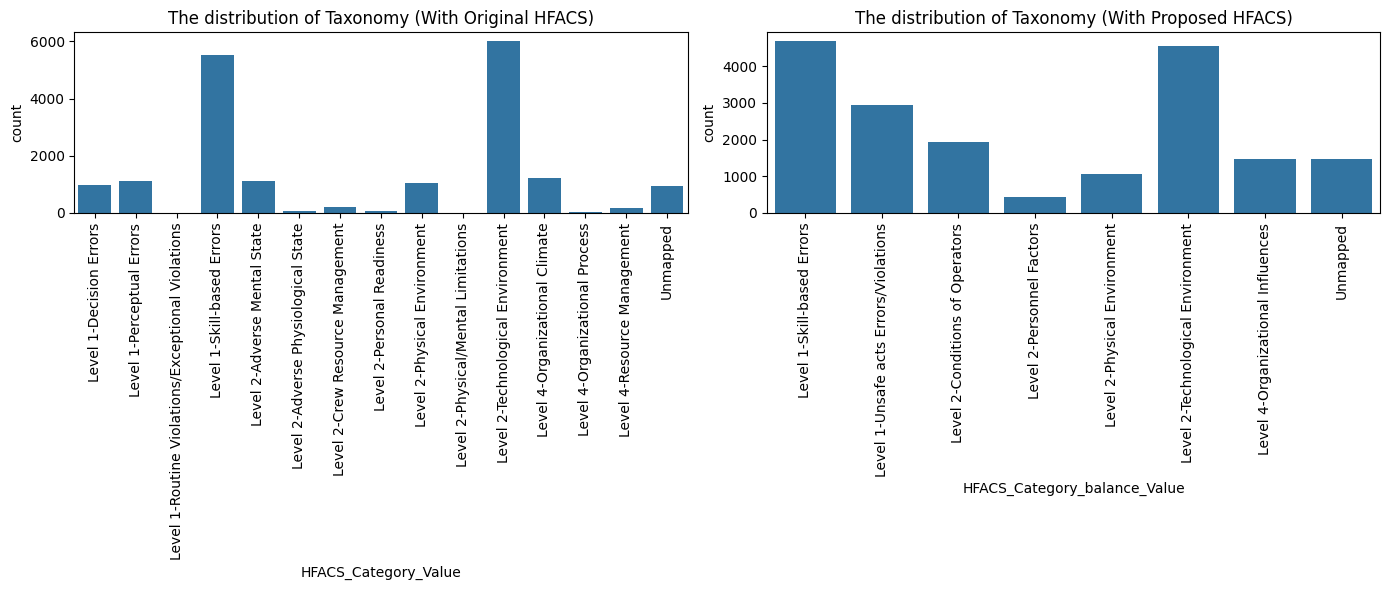

(18549, 5)


In [37]:

sample_df =  asrs_ntsb_df.copy() #.sample(n=2000)

autoLabeling = AutoLabeling(sample_df)

autoLabeling.do_auto_label()

print(sample_df.shape)



In [12]:
sample_df[sample_df['finding_description']=='Aircraft-Aircraft']

,event_id,date,finding_description,narrative_01,narrative_02
216312,1961591,2023-01-01,Aircraft-Aircraft,Crew Alert System Check Hydraulic Quantity Amb...,In-flight had Low Combined Hydraulic Quantity ...
216333,1962089,2023-01-01,Aircraft-Aircraft,As we got onto the Runway; we got cleared to t...,Aborted Takeoff on Runway XXR at ZZZ. After be...
216340,1962186,2023-01-01,Aircraft-Aircraft,Cleared for takeoff Runway XXL. Flock of seagu...,NaN
216352,1962437,2023-01-01,Aircraft-Aircraft,Approximately XA:00; we received an E2 Anti Ic...,NaN
216353,1962444,2023-01-01,Aircraft-Aircraft,Cabin pressure rate climbed fast. Verified wit...,Climbing through 12;000 feet; loud noise comin...
...,...,...,...,...,...
220805,2067266,2023-12-01,Aircraft-Aircraft,Shortly after level off prior to the entry poi...,NaN
220806,2067292,2023-12-01,Aircraft-Aircraft,Passing around 20;000 MSL we experienced multi...,NaN
220813,2067516,2023-12-01,Aircraft-Aircraft,During our climb out between 5;000 and 7;000 f...,After takeoff; from [Runway] 10L at ORD; durin...
220814,2067706,2023-12-01,Aircraft-Aircraft,After takeoff; an initial climbing right turn ...,NaN
